In [65]:
import numpy as np
import pandas as pd
%matplotlib inline

# sc without disc

In [66]:
sc_non_best_param = np.load("../code/baseline/result/sc-non-disc-cluster-param.npy").item()

In [67]:
sc_non_best_param

{1: {0: 1, 1: 6, 2: 46, 3: 1, 4: 1},
 2: {0: 44, 1: 30, 2: 44, 3: 50, 4: 8},
 3: {0: 25, 1: 17, 2: 16, 3: 3, 4: 45}}

In [68]:
sc_non_pred = {}
sc_non_gt = {}
sc_non_error = {}
for cluster in [1, 2, 3]:
    sc_non_pred[cluster] = {}
    sc_non_gt[cluster] = {}
    sc_non_error[cluster] = {}
    for cur_fold in range(5):
        num_latent = sc_non_best_param[cluster][cur_fold]
        sc_non_pred[cluster][cur_fold] = np.load("../code/baseline/sc-non-nested-cluster/sc-non-test-pred-2-{}-{}-{}.npy".format(cluster, cur_fold, num_latent))
        sc_non_gt[cluster][cur_fold] = np.load("../code/baseline/sc-non-nested-cluster/sc-non-test-gt-2-{}-{}-{}.npy".format(cluster, cur_fold, num_latent))
        sc_non_error[cluster][cur_fold] = np.load("../code/baseline/sc-non-nested-cluster/sc-non-test-error-2-{}-{}-{}.npy".format(cluster, cur_fold, num_latent)).item()

In [69]:
np.save("../code/baseline/result/sc-non-disc-cluster-pred.npy", sc_non_pred)
np.save("../code/baseline/result/sc-non-disc-cluster-gt.npy", sc_non_gt)
np.save("../code/baseline/result/sc-non-disc-cluster-error.npy", sc_non_error)

In [108]:
sc_non_cluster_mean = {}
for i in [1, 2, 3]:
    sc_non_cluster_mean[i] = pd.DataFrame(sc_non_error[i]).mean(axis=1)

In [109]:
sc_non_cluster_mean

{1: dr         86.943173
 dw         36.531583
 fridge    476.695075
 hvac       88.114592
 mw         72.330203
 dtype: float64, 2: dr         90.867957
 dw         48.012681
 fridge    269.302979
 hvac      124.232917
 mw         88.789936
 dtype: float64, 3: dr        131.023796
 dw         83.543403
 fridge    678.037714
 hvac       56.324669
 mw        139.315489
 dtype: float64}

In [71]:
pd.DataFrame(sc_non_cluster_mean).mean(axis=1)

dr        102.944976
dw         56.029223
fridge    474.678589
hvac       89.557393
mw        100.145209
dtype: float64

Text(0.5,1,'SC without Discriminative')

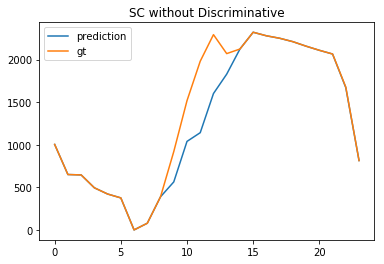

In [72]:
cluster = 2
fold = 0
appliance_index = 0
day = 50

ax = pd.DataFrame(sc_non_pred[cluster][fold][0][appliance_index][day]).plot()
pd.DataFrame(sc_non_gt[cluster][fold][0][appliance_index][day]).plot(ax=ax)
ax.legend(["prediction", "gt"])
ax.set_title("SC without Discriminative")

# disc with discriminative

In [73]:
sc_with_best_param = np.load("../code/baseline/result/sc-with-disc-cluster-param.npy").item()

In [74]:
sc_with_best_param[3][0]['num_latent']

32

In [78]:
sc_with_best_param[3][0]

{'iters': 80, 'num_latent': 32}

In [76]:
sc_with_pred = {}
sc_with_gt = {}
sc_with_error = {}
for cluster in [1, 2, 3]:
    sc_with_pred[cluster] = {}
    sc_with_gt[cluster] = {}
    sc_with_error[cluster] = {}
    for cur_fold in range(5):
        print(cluster, cur_fold)
        num_latent = sc_with_best_param[cluster][cur_fold]['num_latent']
        iters = sc_with_best_param[cluster][cur_fold]['iters']
        sc_with_pred[cluster][cur_fold] = np.load("../code/baseline/sc-with-nested-cluster/sc-with-test-pred-2-{}-{}-{}-{}.npy".format(cluster, cur_fold, num_latent, iters))
        sc_with_gt[cluster][cur_fold] = np.load("../code/baseline/sc-with-nested-cluster/sc-with-test-gt-2-{}-{}-{}-{}.npy".format(cluster, cur_fold, num_latent, iters))
        sc_with_error[cluster][cur_fold] = np.load("../code/baseline/sc-with-nested-cluster/sc-with-test-error-2-{}-{}-{}-{}.npy".format(cluster, cur_fold, num_latent, iters)).item()

1 0
1 1
1 2
1 3
1 4
2 0
2 1
2 2
2 3
2 4
3 0
3 1
3 2
3 3
3 4


In [110]:
sc_with_error[3][0]

{'dr': 52.169726518938354,
 'dw': 1382.670559989291,
 'fridge': 96.342792020803671,
 'hvac': 1410.3697544907857,
 'mw': 8.1859778021316743}

In [80]:
sc_with_best_param[3][0]

{'iters': 80, 'num_latent': 32}

In [81]:
np.save("../code/baseline/result/sc-with-disc-cluster-pred.npy", sc_with_pred)
np.save("../code/baseline/result/sc-with-disc-cluster-gt.npy", sc_with_gt)
np.save("../code/baseline/result/sc-with-disc-cluster-error.npy", sc_with_error)

In [82]:
sc_with_cluster_mean = {}
for i in [1, 2, 3]:
    print(pd.DataFrame(sc_with_error[i]).mean(axis=1))
    sc_with_cluster_mean[i] = pd.DataFrame(sc_with_error[i]).mean(axis=1)

dr         77.069739
dw         19.062775
fridge    113.104051
hvac       44.238231
mw         10.568863
dtype: float64
dr        75.164376
dw        20.177581
fridge    81.506885
hvac      67.749981
mw         8.308950
dtype: float64
dr         96.556678
dw        298.408382
fridge     91.221208
hvac      294.291921
mw         22.184366
dtype: float64


In [111]:
pd.DataFrame(sc_with_cluster_mean).mean(axis=1)

dr         82.930264
dw        112.549579
fridge     95.277382
hvac      135.426711
mw         13.687393
dtype: float64

# stf

In [113]:
stf_best_param = np.load("../code/baseline/result/stf-cluster-param.npy").item()

In [114]:
stf_pred = {}
stf_gt = {}
stf_error = {}
for cluster in [1, 2, 3]:
    stf_pred[cluster] = {}
    stf_gt[cluster] = {}
    stf_error[cluster] = {}
    for cur_fold in range(5):
        num_latent = stf_best_param[cluster][cur_fold]['num_latent']
        iters = stf_best_param[cluster][cur_fold]['iters']
        lr = stf_best_param[cluster][cur_fold]['lr']
        
        stf_pred[cluster][cur_fold] = np.load("../code/baseline/stf-cluster/test/stf-test-pred-2-{}-{}-{}-{}-{}.npy".format(cluster, cur_fold, num_latent, lr, iters))
        stf_gt[cluster][cur_fold] = np.load("../code/baseline/stf-cluster/test/stf-test-gt-2-{}-{}-{}-{}-{}.npy".format(cluster, cur_fold, num_latent, lr, iters))
        stf_error[cluster][cur_fold] = np.load("../code/baseline/stf-cluster/test/stf-test-error-2-{}-{}-{}-{}-{}.npy".format(cluster, cur_fold, num_latent, lr, iters)).item()

In [115]:
np.save("../code/baseline/result/stf-cluster-pred.npy", stf_pred)
np.save("../code/baseline/result/stf-cluster-gt.npy", stf_gt)
np.save("../code/baseline/result/stf-cluster-error.npy", stf_error)

In [116]:
stf_cluster_mean = {}
for i in [1, 2, 3]:
    print(pd.DataFrame(stf_error[i]).mean(axis=1))
    stf_cluster_mean[i] = pd.DataFrame(stf_error[i]).mean(axis=1)

dr        132.124674
dw         35.347212
fridge     54.430248
hvac      617.556758
mw         16.836993
dtype: float64
dr        113.199733
dw         24.888842
fridge     44.393105
hvac      359.346847
mw         12.266412
dtype: float64
dr        235.194639
dw         77.982997
fridge     59.890149
hvac      760.789225
mw         18.852925
dtype: float64


In [117]:
pd.DataFrame(stf_cluster_mean).mean(axis=1)

dr        160.173015
dw         46.073017
fridge     52.904501
hvac      579.230943
mw         15.985443
dtype: float64

# mtf

In [118]:
mtf_best_param = np.load("../code/baseline/result/mtf-cluster-param.npy").item()

In [128]:
mtf_pred = {}
mtf_gt = {}
mtf_error = {}
for cluster in [1, 2, 3]:
    mtf_pred[cluster] = {}
    mtf_gt[cluster] = {}
    mtf_error[cluster] = {}
    for cur_fold in range(5):
        num_latent = mtf_best_param[cluster][cur_fold]['num_latent']
        iters = mtf_best_param[cluster][cur_fold]['iters']
        lr = mtf_best_param[cluster][cur_fold]['lr']
        
        mtf_pred[cluster][cur_fold] = np.load("../code/baseline/mtf-cluster/test/mtf-test-pred-2-{}-{}-{}-{}-{}.npy".format(cluster, cur_fold, num_latent, lr, iters))
        mtf_gt[cluster][cur_fold] = np.load("../code/baseline/mtf-cluster/test/mtf-test-gt-2-{}-{}-{}-{}-{}.npy".format(cluster, cur_fold, num_latent, lr, iters))
        mtf_error[cluster][cur_fold] = np.load("../code/baseline/mtf-cluster/test/mtf-test-error-2-{}-{}-{}-{}-{}.npy".format(cluster, cur_fold, num_latent, lr, iters)).item()

In [30]:
np.save("../code/baseline/result/mtf-cluster-pred.npy", mtf_pred)
np.save("../code/baseline/result/mtf-cluster-gt.npy", mtf_gt)
np.save("../code/baseline/result/mtf-cluster-error.npy", mtf_error)

In [134]:
sc_err_df = pd.DataFrame(sc_non_cluster_mean)
dsc_err_df = pd.DataFrame(sc_with_cluster_mean)
stf_err_df = pd.DataFrame(stf_cluster_mean)
mtf_err_df = pd.DataFrame(mtf_cluster_mean)

In [157]:
sc_mean_err_df = pd.DataFrame(sc_err_df.mean(), columns=['SC'])
dsc_mean_err_df = pd.DataFrame(dsc_err_df.mean(), columns=['DSC'])
stf_mean_err_df = pd.DataFrame(stf_err_df.mean(), columns=['STF'])
mtf_mean_err_df = pd.DataFrame(mtf_err_df.mean(), columns=['MTF'])

In [158]:
sc_mean_err_df

,SC
1,152.122925
2,124.241294
3,217.649014


In [159]:
mean_error = pd.concat([sc_mean_err_df, dsc_mean_err_df, stf_mean_err_df, mtf_mean_err_df], axis=1)

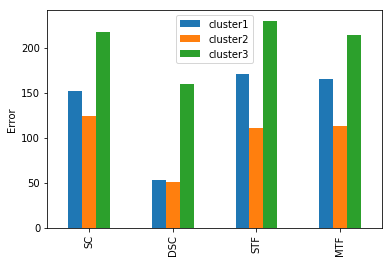

In [167]:
ax = pd.DataFrame(mean_error).T.plot(kind='bar')
ax.set_ylabel("Error")
ax.legend(['cluster1', 'cluster2', 'cluster3'])

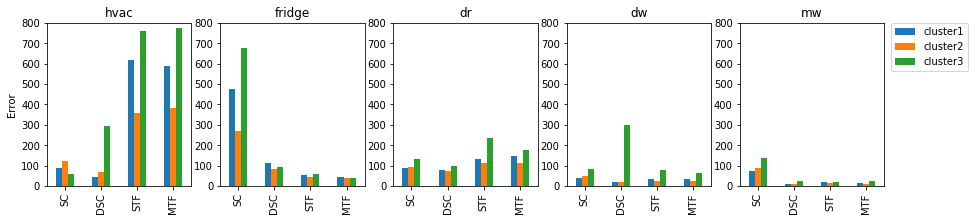

In [192]:

fig, axes = plt.subplots(ncols=5, figsize=(15, 3))
ax = axes.flatten()
count = 0
for appliance in ['hvac', 'fridge', 'dr', 'dw', 'mw']:
    sc_app = pd.DataFrame(pd.DataFrame(sc_non_cluster_mean).loc[appliance]).rename(columns = {appliance:'SC'})
    dsc_app = pd.DataFrame(pd.DataFrame(sc_with_cluster_mean).loc[appliance]).rename(columns = {appliance:'DSC'})
    stf_app = pd.DataFrame(pd.DataFrame(stf_cluster_mean).loc[appliance]).rename(columns = {appliance:'STF'})
    mtf_app = pd.DataFrame(pd.DataFrame(mtf_cluster_mean).loc[appliance]).rename(columns = {appliance:'MTF'})
    mean_error = pd.concat([sc_app, dsc_app, stf_app, mtf_app], axis=1)

    pd.DataFrame(mean_error).T.plot(kind='bar', ax=ax[count], legend=False)
    ax[count].set_ylim(0, 800)
    ax[count].set_title(appliance)
    count += 1
ax[0].set_ylabel("Error")
ax[count-1].legend(['cluster1', 'cluster2', 'cluster3'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


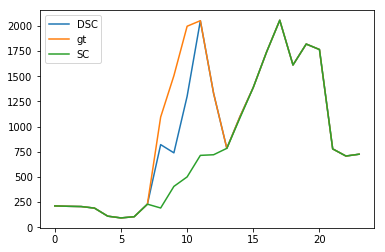

In [31]:
cluster = 2
fold = 0
home = 0
appliance_index = 0
day = 0

ax = pd.DataFrame(sc_with_pred[cluster][fold][home][appliance_index][day]).plot()
pd.DataFrame(sc_with_gt[cluster][fold][home][appliance_index][day]).plot(ax=ax)
pd.DataFrame(sc_non_pred[cluster][fold][home][appliance_index][day]).plot(ax=ax)
ax.legend(["DSC", "gt", "SC"])
# ax.set_title("SC with Discriminative")

In [32]:
import matplotlib.pyplot as plt

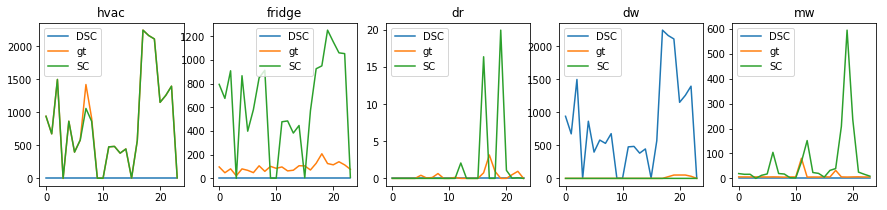

In [34]:
cluster = 3
fold = 2
home =1
appliance_index = 0
day = 0
appliance = ['hvac', 'fridge', 'dr', 'dw', 'mw']

fig, axes = plt.subplots(ncols=5, figsize=(15, 3))
ax = axes.flatten()
count = 0
for j in range(5):
    pd.DataFrame(sc_with_pred[cluster][fold][home][j][day]).plot(ax=ax[count])
    pd.DataFrame(sc_with_gt[cluster][fold][home][j][day]).plot(ax=ax[count])
    pd.DataFrame(sc_non_pred[cluster][fold][home][j][day]).plot(ax=ax[count])
    ax[count].legend(["DSC", "gt", "SC"])
    ax[count].set_title(appliance[j])
    count += 1